In [11]:
%load_ext autoreload
%autoreload 2

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
import torch.optim as optim
from torch import nn
import torch
from torch.utils.data import Dataset, DataLoader, Subset
from utils import ProcessedDataDataset, Model, Model2, Trainer, train_val_test_split_indices, evaluate
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [13]:
data_raw, mean, std = pkl.load(open('data/processed_dataset.pkl', 'rb'))

In [14]:
# Instantiate the dataset
dataset = ProcessedDataDataset(data_raw)

train_indices, val_indices, test_indices = train_val_test_split_indices(range(len(dataset)),train_size=0.7, val_size=0.15, test_size=0.15, random_seed=42)

train_dataset = Subset(dataset, train_indices)
val_dataset = Subset(dataset, val_indices)
test_dataset = Subset(dataset, test_indices)

# DataLoaders for train and test sets
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [51]:
model = Model(mean=mean, std=std)
model2 = Model2(mean=mean, std=std)
criterion = nn.MSELoss()  # Assuming regression task
optimizer = optim.Adam(model.parameters(), lr=0.0001)
optimizer2 = optim.Adam(model2.parameters(), lr=0.0001)

In [52]:
trainer = Trainer(model, "descriptor", train_loader, val_loader, criterion, optimizer, device='cuda' if torch.cuda.is_available() else 'cpu')
loss_bin = trainer.train(num_epochs=500)

trainer_2 = Trainer(model2, 'descriptor_2', train_loader, val_loader, criterion, optimizer2, device='cuda' if torch.cuda.is_available() else 'cpu')
loss_bin_2 = trainer_2.train(num_epochs=500)

Epoch [1/500], Loss: 0.3072
val Loss after Epoch [1/500]: 0.2801
Epoch [2/500], Loss: 0.3022
val Loss after Epoch [2/500]: 0.2734
Epoch [3/500], Loss: 0.2840
val Loss after Epoch [3/500]: 0.2516
Epoch [4/500], Loss: 0.2564
val Loss after Epoch [4/500]: 0.2367
Epoch [5/500], Loss: 0.2439
val Loss after Epoch [5/500]: 0.2325
Epoch [6/500], Loss: 0.2351
val Loss after Epoch [6/500]: 0.2270
Epoch [7/500], Loss: 0.2274
val Loss after Epoch [7/500]: 0.2154
Epoch [8/500], Loss: 0.2153
val Loss after Epoch [8/500]: 0.2051
Epoch [9/500], Loss: 0.1993
val Loss after Epoch [9/500]: 0.1871
Epoch [10/500], Loss: 0.1837
val Loss after Epoch [10/500]: 0.1745
Epoch [11/500], Loss: 0.1706
val Loss after Epoch [11/500]: 0.1659
Epoch [12/500], Loss: 0.1592
val Loss after Epoch [12/500]: 0.1524
Epoch [13/500], Loss: 0.1519
val Loss after Epoch [13/500]: 0.1476
Epoch [14/500], Loss: 0.1478
val Loss after Epoch [14/500]: 0.1444
Epoch [15/500], Loss: 0.1432
val Loss after Epoch [15/500]: 0.1437
Epoch [16/500

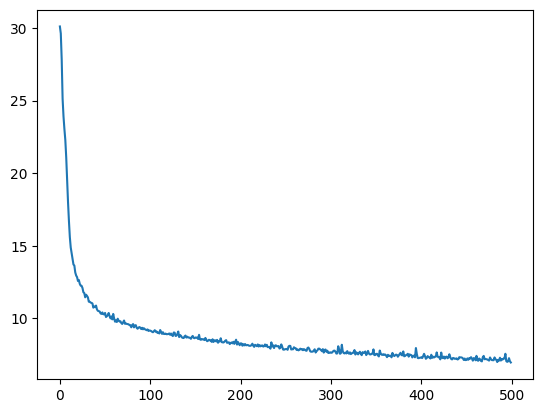

In [53]:
plt.plot(np.arange(len(loss_bin)), loss_bin)

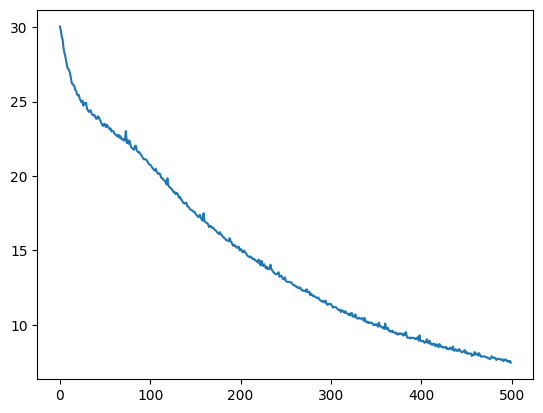

In [54]:
plt.plot(np.arange(len(loss_bin_2)), loss_bin_2)

Text(0, 0.5, 'Target (eV/atom)')

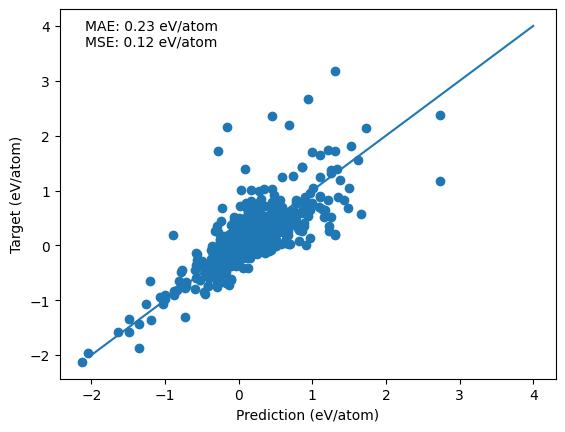

In [57]:
pred_list, targ_list = evaluate(model, "descriptor", test_loader, "cpu")
mse = mean_squared_error(pred_list, targ_list)
mae = mean_absolute_error(pred_list, targ_list)
r2 =  r2_score(pred_list, targ_list)
plt.scatter(pred_list, targ_list)
plt.plot(np.arange(-2,5), np.arange(-2,5))
# Add annotation with the correct position for MAE
plt.annotate(f"MAE: {mae:.2f} eV/atom\nMSE: {mse:.2f} eV/atom", xy=(0.05, 0.9), xycoords='axes fraction')

# plt.annotate(f"MAE: {mae:.2f} eV/atom")
# plt.annotate(f"MAE: {mae:.2f} eV/atom")
plt.xlabel("Prediction (eV/atom)")
plt.ylabel("Target (eV/atom)")

Text(0, 0.5, 'Target (eV/atom)')

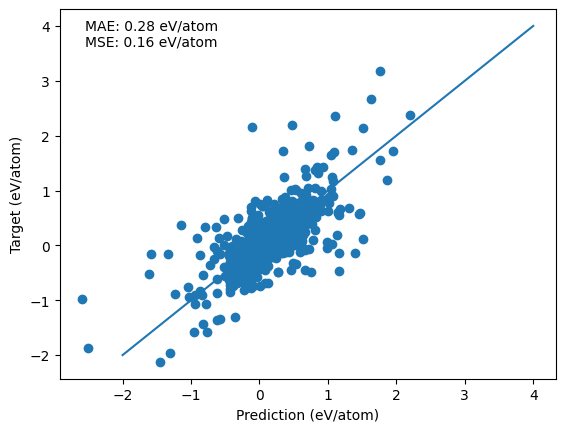

In [58]:
pred_list_2, targ_list_2 = evaluate(model2,"descriptor_2", test_loader, "cpu")
mse_2 = mean_squared_error(pred_list_2, targ_list_2)
mae_2 = mean_absolute_error(pred_list_2, targ_list_2)
r2_2 =  r2_score(pred_list_2, targ_list_2)
plt.scatter(pred_list_2, targ_list_2)
plt.plot(np.arange(-2,5), np.arange(-2,5))
# Add annotation with the correct position for MAE
plt.annotate(f"MAE: {mae_2:.2f} eV/atom\nMSE: {mse_2:.2f} eV/atom", xy=(0.05, 0.9), xycoords='axes fraction')

# plt.annotate(f"MAE: {mae:.2f} eV/atom")
# plt.annotate(f"MAE: {mae:.2f} eV/atom")
plt.xlabel("Prediction (eV/atom)")
plt.ylabel("Target (eV/atom)")